In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import scipy.stats as st
from sklearn.covariance import MinCovDet
from time import time

from context import predicate_search
from predicate_search import PredicateInduction, PredicateData, PredicateSearch, ContBasePredicate, DiscBasePredicate, CompoundPredicate, RobustNormal

In [2]:
raw_data = pd.read_csv('../data/sensor_data.csv')
raw_data.dtime = pd.to_datetime(raw_data.dtime)
startdate = '2004-2-28'
enddate = '2004-3-3'
df = raw_data[(raw_data.dtime>=startdate) & (raw_data.dtime<=enddate)].reset_index(drop=True)

In [3]:
predicate_induction = PredicateInduction()

In [15]:
predicate_induction.fit(df, how='t', disc_cols=['moteid'])

/Users/bmontambault/anaconda3/envs/forecasting/lib/python3.7/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/bmontambault/anaconda3/envs/forecasting/lib/python3.7/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/Users/bmontambault/anaconda3/envs/forecasting/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the N

In [16]:
targets = ['temperature']

In [17]:
distances = predicate_induction.m.get_distances(predicate_induction.norm_data, targets)

In [18]:
d = pd.Series(distances).sort_values(ascending=False).reset_index(drop=True).reset_index()

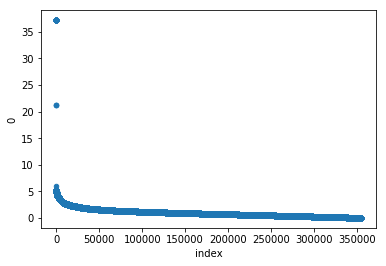

In [19]:
d.plot.scatter(x='index', y=0)

In [20]:
threshold = 30

In [31]:
tick = time()
predicates = predicate_induction.predicate_induction(targets, threshold, c=1, quantile=.25, verbose=True)
print(time() - tick)

iter 0
voltage: [(71, 72)] 25264821.26606269
humidity: [(96, 96)] 25264821.266062688
humidity: [(95, 95)] 11641514.60961186
voltage: [(73, 73)] 3900039.9074993543
dtime: [(82, 82)] 1237545.702474342
moteid: [15.0] 1137425.3606808472
dtime: [(90, 90)] 978167.6005195888

[humidity: [(96, 96)], voltage: [(71, 72)]]
iter 0
[dtime: [(82, 82)], moteid: [15.0]] 25264821.266062688
[dtime: [(90, 90)], moteid: [15.0]] 25264821.266062688

iter 1
[dtime: [(82, 82), (90, 90)], moteid: [15.0]] 25264821.266062688

[[dtime: [(82, 82), (90, 90)], moteid: [15.0]]]
7.0347678661346436


In [32]:
predicates

[humidity: [(1.6945400000000002, 16.8286)],
 voltage: [(2.27556, 2.3291)],
 [dtime: [(Timestamp('2004-03-02 07:40:59.828653'), Timestamp('2004-03-02 23:59:59.543254'))], moteid: [15.0]]]

In [33]:
tick = time()
predicates = predicate_induction.predicate_induction(targets, threshold=None, c=1, quantile=.25, verbose=True)
print(time() - tick)

iter 0
voltage: [(71, 72)] 25264821.26606269
humidity: [(96, 96)] 25264821.266062688
humidity: [(95, 95)] 11641514.60961186
voltage: [(73, 73)] 3900039.9074993543
voltage: [(88, 88)] 1775724.5357988658
voltage: [(87, 87)] 1442482.7721650037
dtime: [(82, 82)] 1237545.702474342
dtime: [(83, 83)] 1147577.8298266698
moteid: [15.0] 1137425.3606808472
dtime: [(84, 84)] 1113958.2009362674
voltage: [(86, 86)] 1111699.140771229
dtime: [(62, 62)] 1092798.039069536
dtime: [(61, 61)] 1051401.9227751615
dtime: [(63, 63)] 1036456.4389135378
dtime: [(64, 64)] 1031643.2519367911
dtime: [(65, 65)] 1020697.5444454289
dtime: [(87, 87)] 1018872.3659297776
dtime: [(66, 66)] 1016609.1541615608
dtime: [(88, 88)] 1006858.1737124404
dtime: [(13, 13)] 993603.6736662063
voltage: [(85, 85)] 990467.4083721353
dtime: [(86, 86)] 989686.2421214588
dtime: [(89, 89)] 989221.0324791237
dtime: [(67, 67)] 986632.5653580889
dtime: [(90, 90)] 978167.6005195888
light: [(99, 99)] 968606.0613211665
dtime: [(85, 85)] 963761.141

In [28]:
predicates

[humidity: [(1.6945400000000002, 16.8286)],
 voltage: [(2.27556, 2.3291)],
 [dtime: [(Timestamp('2004-03-02 06:43:24.394061'), Timestamp('2004-03-02 23:59:59.543254'))], moteid: [15.0]]]